In [109]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# setting floats to 2 decimals to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# ensure to show all columns
pd.set_option('display.max_columns', 999)

Online Sales description

# Additional Information

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

# Variable Information

* Invoice: Invoice number (Nominal): A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

* StockCode: Product item code (Nominal): A 5-digit integral number uniquely assigned to each distinct product.

* Description: Product item name (NominaL):

* Quantity: The quantities of each product item per transaction (Numeric).

* InvoiceDate: Invoice date and time (Numeric): The day and time when a transaction was generated.

* Price: Unit price (Numeric): Product price per unit in pounds(£).

* CustomerID: Customer number (Nominal): A 5-digit integral number uniquely assigned to each customer.

* Country: Country name (Nominal): The name of the country where a customer resides.

In [110]:
df = pd.read_excel('/content/online_retail_II.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


# E.D.A

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [112]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


There are 2928 missing values in Description and 107927 in Customer

In [113]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


There are some negatives values in the summary statistics of our data (Quantitiy and Invoice), it might be worth considering during data cleaning.

In [114]:
df.describe(include='O')  # STRING LIKE DATA SUMMARY

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


Someone with Invoice number 537434 placed the highest order (675 goods)

WHITE HANGING HEART T-LIGHT HOLDER is the most ordered product; It was ordered 3516 times

Observing the missing Values in Customer ID:

In [115]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [116]:
df[df['Quantity'] <= 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


Trying to see if there is a direct relation to missing Values in Customer ID and Quantities that are 0 or below; because it is an unusual situation for quantity to be zero or less

In [117]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d(6)$')  == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


Observing Invoices that are not exactly 6 digits because according to our variable info; a valid transaction should be exactly 6 digits (Invoice number)

In [118]:
df['Invoice'].str.replace('[0-9]',"", regex=True).unique() # replacing all digits with '',i.e empty string

array(['', 'C', 'A'], dtype=object)

In [119]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Clearly this will not be needed in our evaluation of customer segmentation because the Description 'Adjust bad debt', Customer ID 'NaN', Stock code 'B'...that's enough reason for this data to be dropped during cleaning

In [120]:
df['StockCode'] = df['StockCode'].astype('str') # change type to string so we can use REGEX
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


Observing StockCodes that are not exactly 5 digits; they seem like valid transactions

In [121]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a - zA-Z]+$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
525118,538153,84660c,PINK STITCHED WALL CLOCK,1,2010-12-09 16:31:00,7.62,NaN,United Kingdom
525122,538153,84970l,SINGLE HEART ZINC T-LIGHT HOLDER,2,2010-12-09 16:31:00,2.13,NaN,United Kingdom
525123,538153,84970s,HANGING HEART ZINC T-LIGHT HOLDER,3,2010-12-09 16:31:00,2.13,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Observing stockcodes that are not exactly 5 digits and that are not exactly 5 digits followed by letters

In [122]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a - zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', '72349b', '72529w',
       '72807c', '84797b', '85114b', '18096c', '85014b', '18098c',
       '48173c', '79070b', '84030c', '47518f', '15056bl', '35004c',
       '84796b', '85164b', 'M', '84705b', '35004s', '84509c', '84951b',
       '37482p', '85114c', 'DCGS0004', 'DCGS0076', 'C2', 'BANK CHARGES',
       'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072', 'gift_0001_20',
       'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50', '84406b',
       '72807b', '85232b', '85159b', 'DCGS0066N', '47567b', '85124b',
       '85184c', '37482b', '79302m', '85123b', '84029c', 'gift_0001_30',
       'PADS', '84030b', '84596e', '72801d', '84993b', '84989b', '84867b',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', '82613b', '82613c', 'DCGSSGIRL', 'DCGS0006',
       'DCGS0016', 'DCGS0027', 'DCGS0036', 'DCGS0039', 'DCGS0060',
       'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY', '47559b', '85035b',
       '79066k

Filtering out unique values in our dataset that doesn't contain 5 digits followed by letter(s) or without letter(s)

In [123]:
df[df['StockCode'].str.contains('^DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


# Data Cleaning

In [124]:
cleaned_df = df.copy() # Creating a new dataframe, copying the old dataset

In [125]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


I included only transactions with 6 digits since they are the legit/valid transactions n our data set according to our variable info. leaving out 'C' and 'A' which are Cancelled transactions and Adjusted bad debt.

In [126]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.contains("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


* Include StockCode condition that matches exactly 5 digits
* Include StockCode condition that matches 5 digits followed by letter(s)
* Include StockCode condition matches the string 'PADS' (because they seem to be a legit transaction for our problem statement)

In [127]:
cleaned_df = cleaned_df[mask]
cleaned_df

<ipython-input-127-36c454da7d8d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[mask]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [128]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

Dropping missing Values for Customer ID

In [129]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


Dropping the Null values for Customer ID has helped us get rid of the negative value for quantity because most of the negative values seem to come from NAN values for Customer ID

In [130]:
cleaned_df[cleaned_df['Price'] == 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom


It is unusual to have prices that are at 0.0...this might also be considereable during data cleaning

In [131]:
len(cleaned_df[cleaned_df['Price'] == 0])

28

In [132]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.0]

In [133]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [134]:
cleaned_df['Price'].min()

0.001

In [135]:
round(1 - len(cleaned_df)/len(df), 2)

0.23

Dropped about 23% of records so Far

# Feature Engineering

In [136]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.head()

<ipython-input-136-c83216217a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


Create a new column header to show the total amount of what a customer bought for a particular product

In [137]:
aggregate_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
                        .agg(
                            MonetaryValue=("SalesLineTotal", "sum"),
                            Frequency=("Invoice", "nunique"),
                            LastInvoiceDate=("InvoiceDate", "max")
                        )

aggregate_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


MonetaryValue ("SalesLineTotal", "sum"): This calculates the sum of the "SalesLineTotal" for each customer and assigns it to a new column called "MonetaryValue". This represents the total amount of money spent by each customer.

Frequency ("Invoice", "nunique"): This calculates the number of unique invoices for each customer and assigns it to a new column called "Frequency". This represents how often each customer makes purchases.

LastInvoiceDate ("InvoiceDate", "max"): This determines the latest (maximum) "InvoiceDate" for each customer and assigns it to a new column called "LastInvoiceDate". This indicates the last time each customer made a purchase.

In [138]:
max_invoice_date = aggregate_df["LastInvoiceDate"].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [139]:
max_invoice_date = aggregate_df["LastInvoiceDate"].max()

aggregate_df["Recency"] = (max_invoice_date - aggregate_df["LastInvoiceDate"]).dt.days
aggregate_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


The last time a person made a transaction relative to the max_value(i.e the most recent) of our data

I used the Maximum value because this is a old dataset from 2010

For example; It's been 164days since Customer ID 12346.00 last came to buy something in relation to the latest transaction made by a person

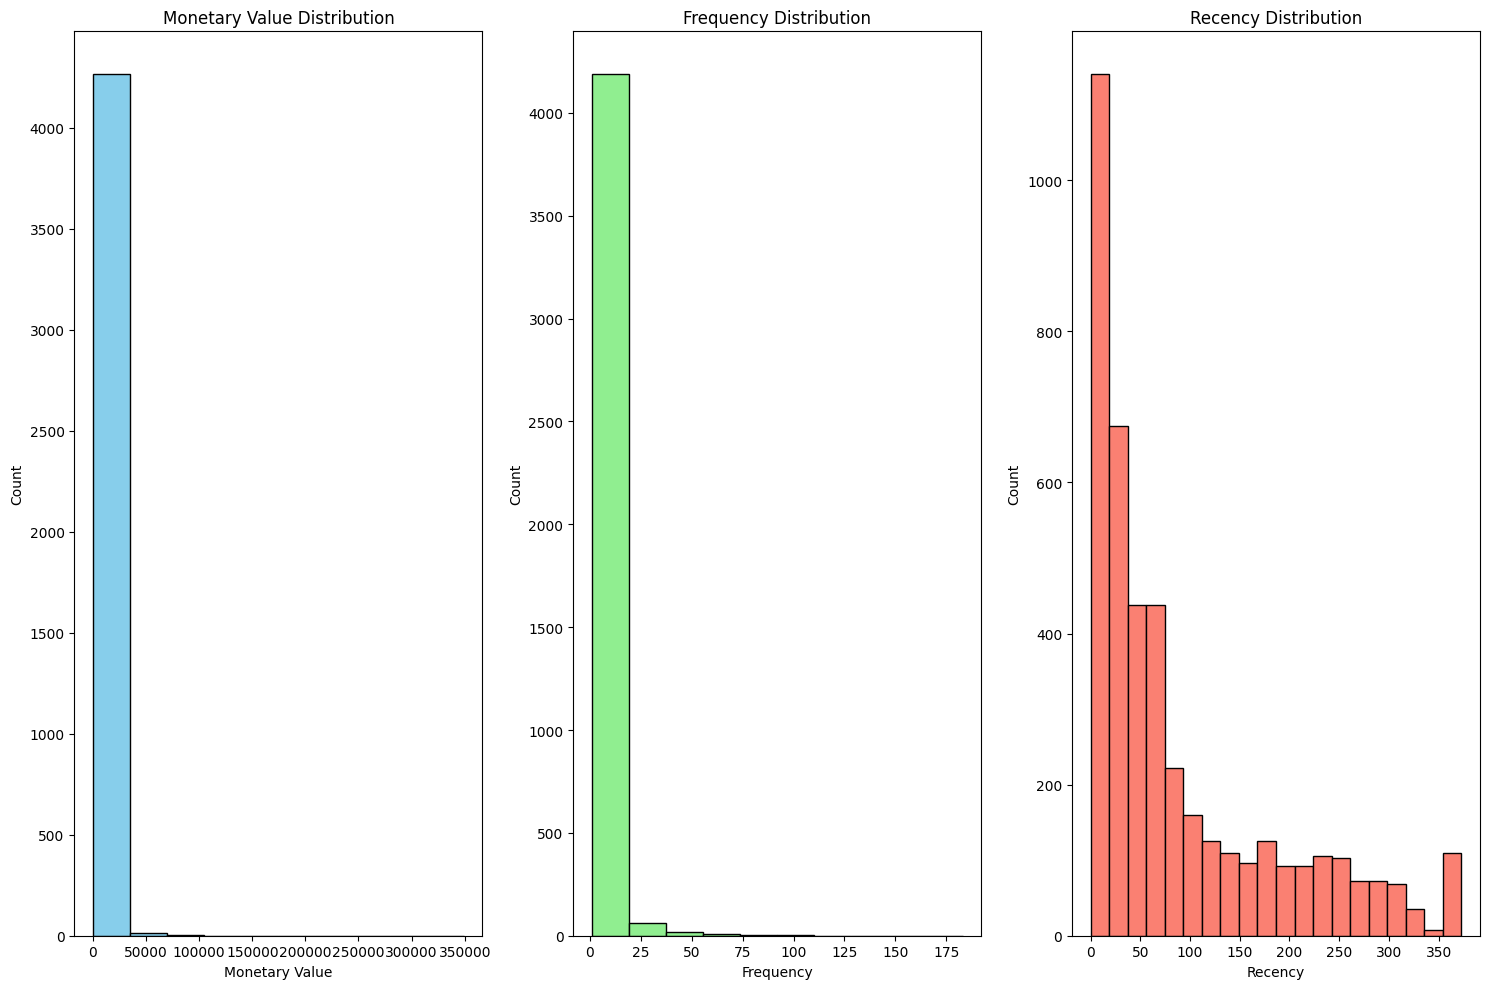

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.hist(aggregate_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregate_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregate_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.tight_layout()

* Monetary Value: The majority of customers in the dataset exhibit a Monetary Value below 5,000 pounds, indicating that their total purchase value is less than this amount. However, there are outliers present with significantly higher Monetary Values.
* Frequency: most customers have a Frequency below 25, suggesting that they have made fewer than 25 unique purchases. Notably, outliers exist in this distribution as well, with some customers exhibiting much higher purchase frequencies.
* Recency distribution: It is right-skewed, implying that a large proportion of customers have made purchases relatively recently, particularly within the last 100 days.

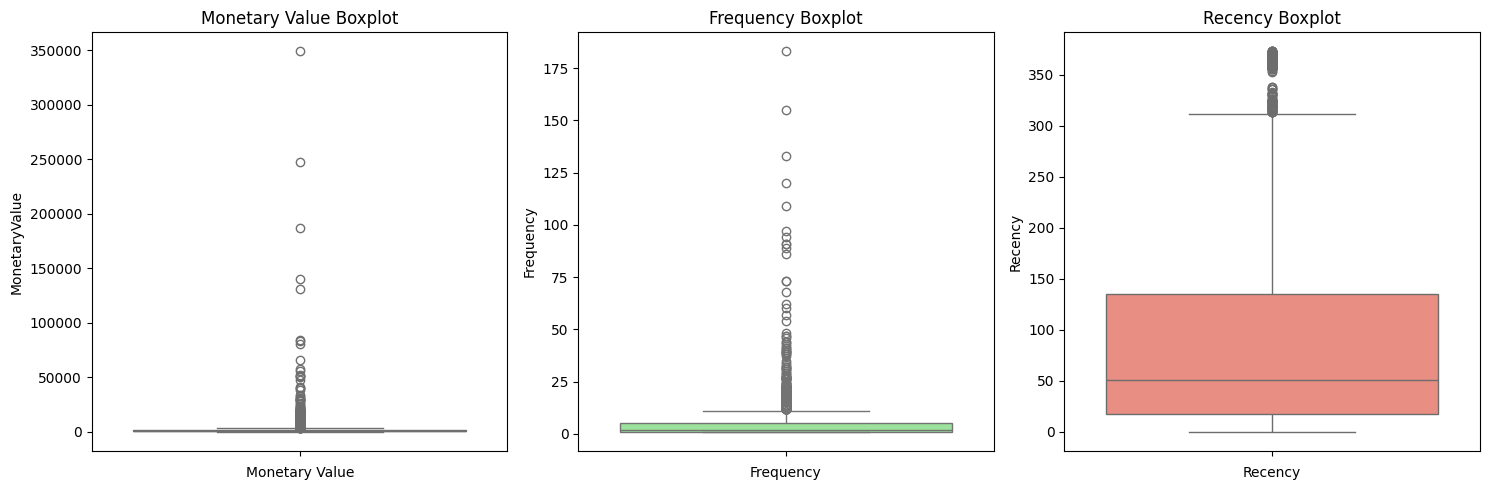

In [141]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregate_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregate_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregate_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel("Recency")

plt.tight_layout()

While extreme outliers exist in Monetary Value and Frequency, removing them is not advisable in the context of customer segmentation. These outliers represent customers who make frequent purchases and have high spending, potentially indicating high-value customers. The distribution of Recency reveals that customers generally have made purchases more recently compared to the distribution of their spending and purchase frequency.

In [142]:
M_Q1 = aggregate_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregate_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregate_df[(aggregate_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (aggregate_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


There are 423 customers in the MonetaryValue outlier, there are also extreme values in the outlier; the minimum MonetaryValue is 3802.04, while the highest is 349164.35

In [143]:
M_Q1 = aggregate_df['Frequency'].quantile(0.25)
M_Q3 = aggregate_df['Frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

Frequency_outliers_df = aggregate_df[(aggregate_df['Frequency'] > (M_Q3 + 1.5 * M_IQR)) | (aggregate_df['Frequency'] < (M_Q1 - 1.5 * M_IQR))].copy()

Frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


There are 279 customers in the frequency outlier. The minimum value in the Frequency outlier, i.e someone that has visited 12 times and the highest occurence is someone who has patronized this online retail 183 times (183 invoices)

In [144]:
# Filtering out non-outliers value
non_outliers_df = aggregate_df[~aggregate_df.index.isin(monetary_outliers_df.index) & ~aggregate_df.index.isin(Frequency_outliers_df.index)]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


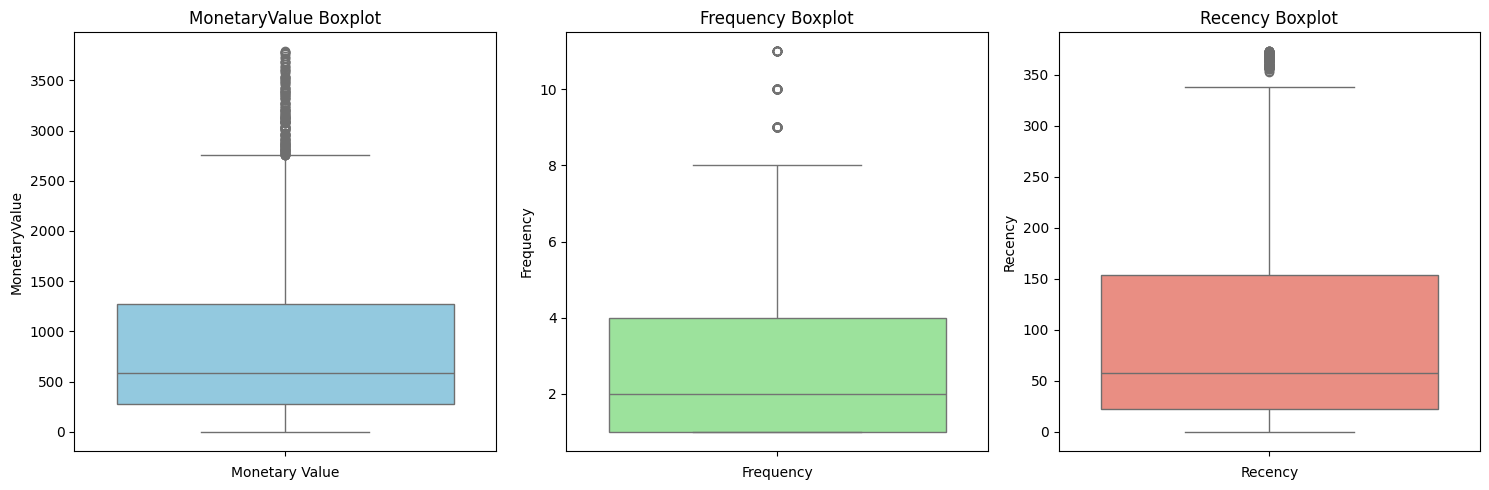

In [145]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('MonetaryValue Boxplot')
plt.xlabel ('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color= 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()

Box and whisker plot for non-outliers

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

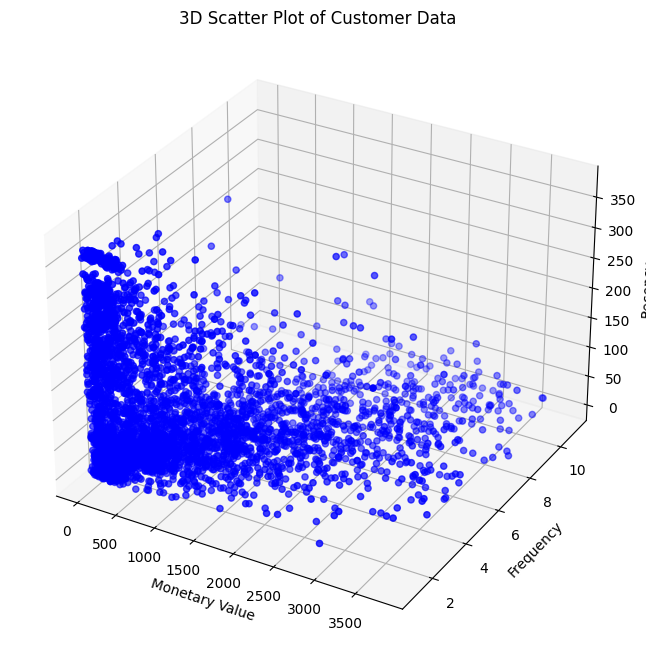

In [146]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c='blue', marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

In [147]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [148]:
scaled_data_df = pd.DataFrame(scaled_data, columns=['MonetaryValue', 'Frequency', 'Recency'])

scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

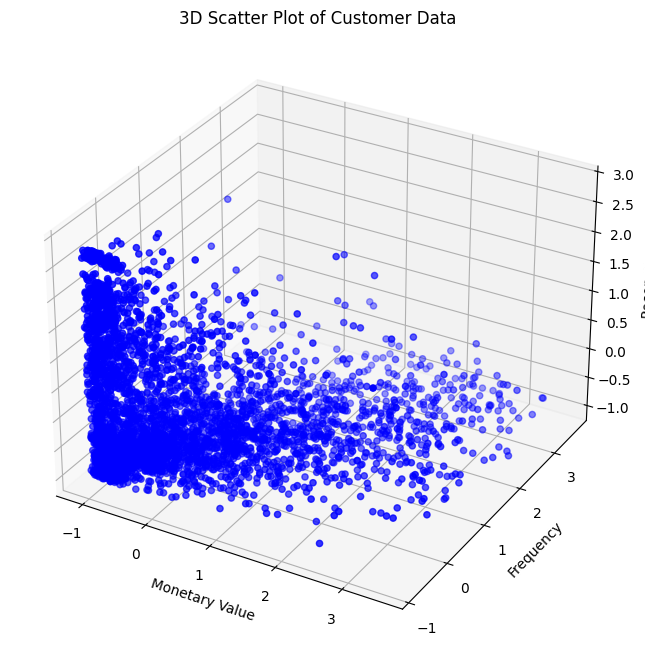

In [149]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c='blue', marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

scaled data 3D plot; the data remains the same just a change in the scales

# KMeans Clustering

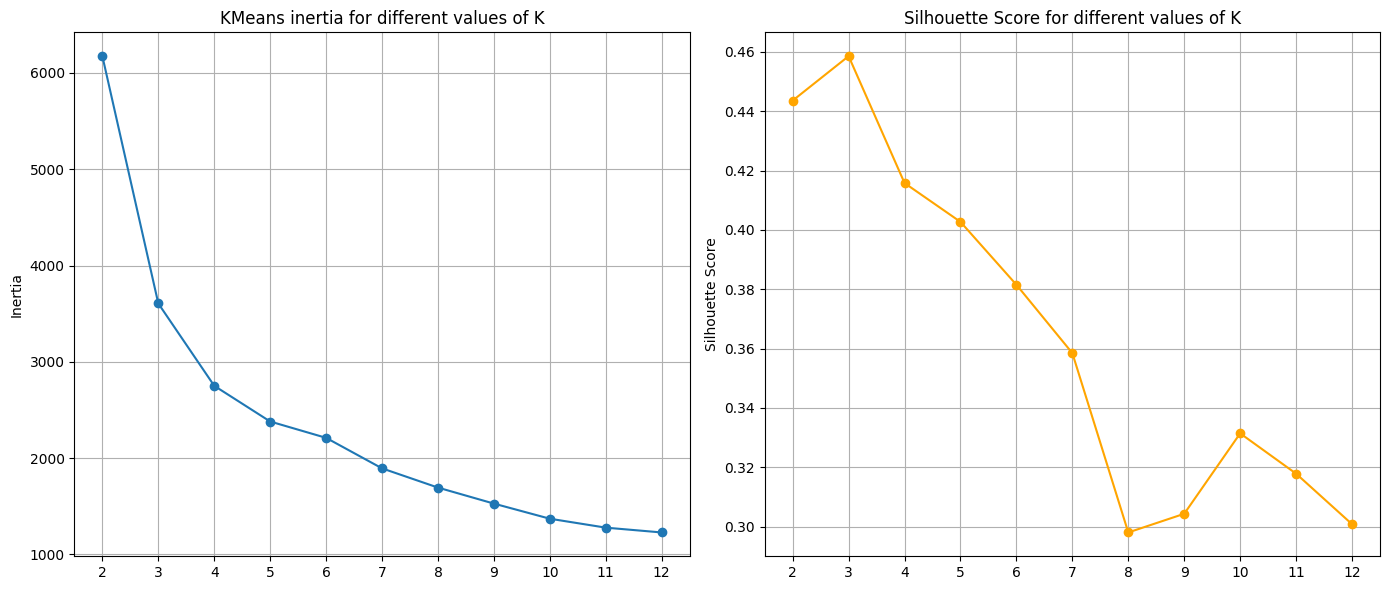

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

# First subplot for inertia
plt.subplot(1, 2, 1)  # Create the first subplot
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans inertia for different values of K')
plt.xticks(k_values)
plt.ylabel('Inertia')
plt.grid(True)

# Second subplot for silhouette score
plt.subplot(1, 2, 2)  # Create the second subplot
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for different values of K')
plt.xticks(k_values)
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()

The elbow method suggests an optimal k-value of 4, as this is where the abrupt change happen.

In [151]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [152]:
non_outliers_df['Cluster'] = cluster_labels

non_outliers_df.head(10)

<ipython-input-152-f14e52f054bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
5,12352.00,343.80,2,2010-11-29 10:07:00,10,2
6,12353.00,317.76,1,2010-10-27 12:44:00,43,2
7,12355.00,488.21,1,2010-05-21 11:59:00,202,1
8,12356.00,3126.25,3,2010-11-24 12:24:00,15,3
10,12358.00,2519.01,3,2010-11-29 10:56:00,10,0


Created a new dataframe to assign each cluster labels

Text(0.5, 0.92, '3D Scatter Plot of Customer Data by Cluster')

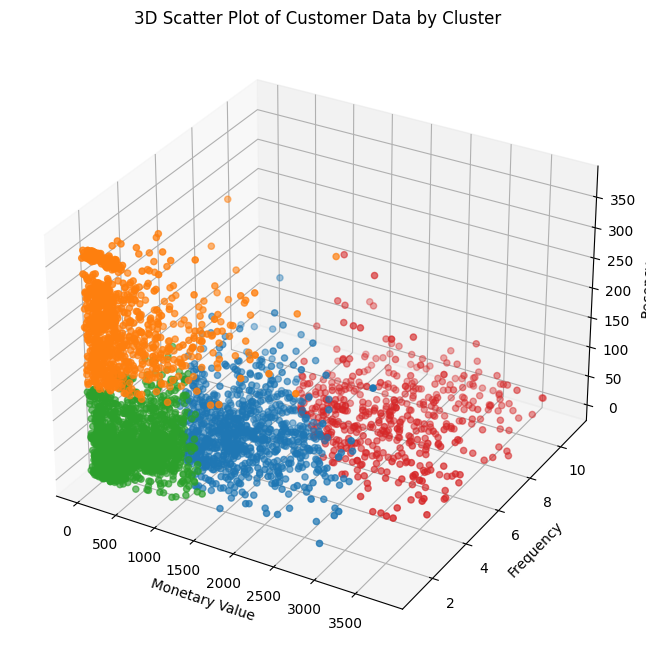

In [153]:
cluster_colors = {
    0: '#1f77b4', # Blue
    1: '#ff7f0e', # Orange
    2: '#2ca02c', # Green
    3: '#d62728',} # Red
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

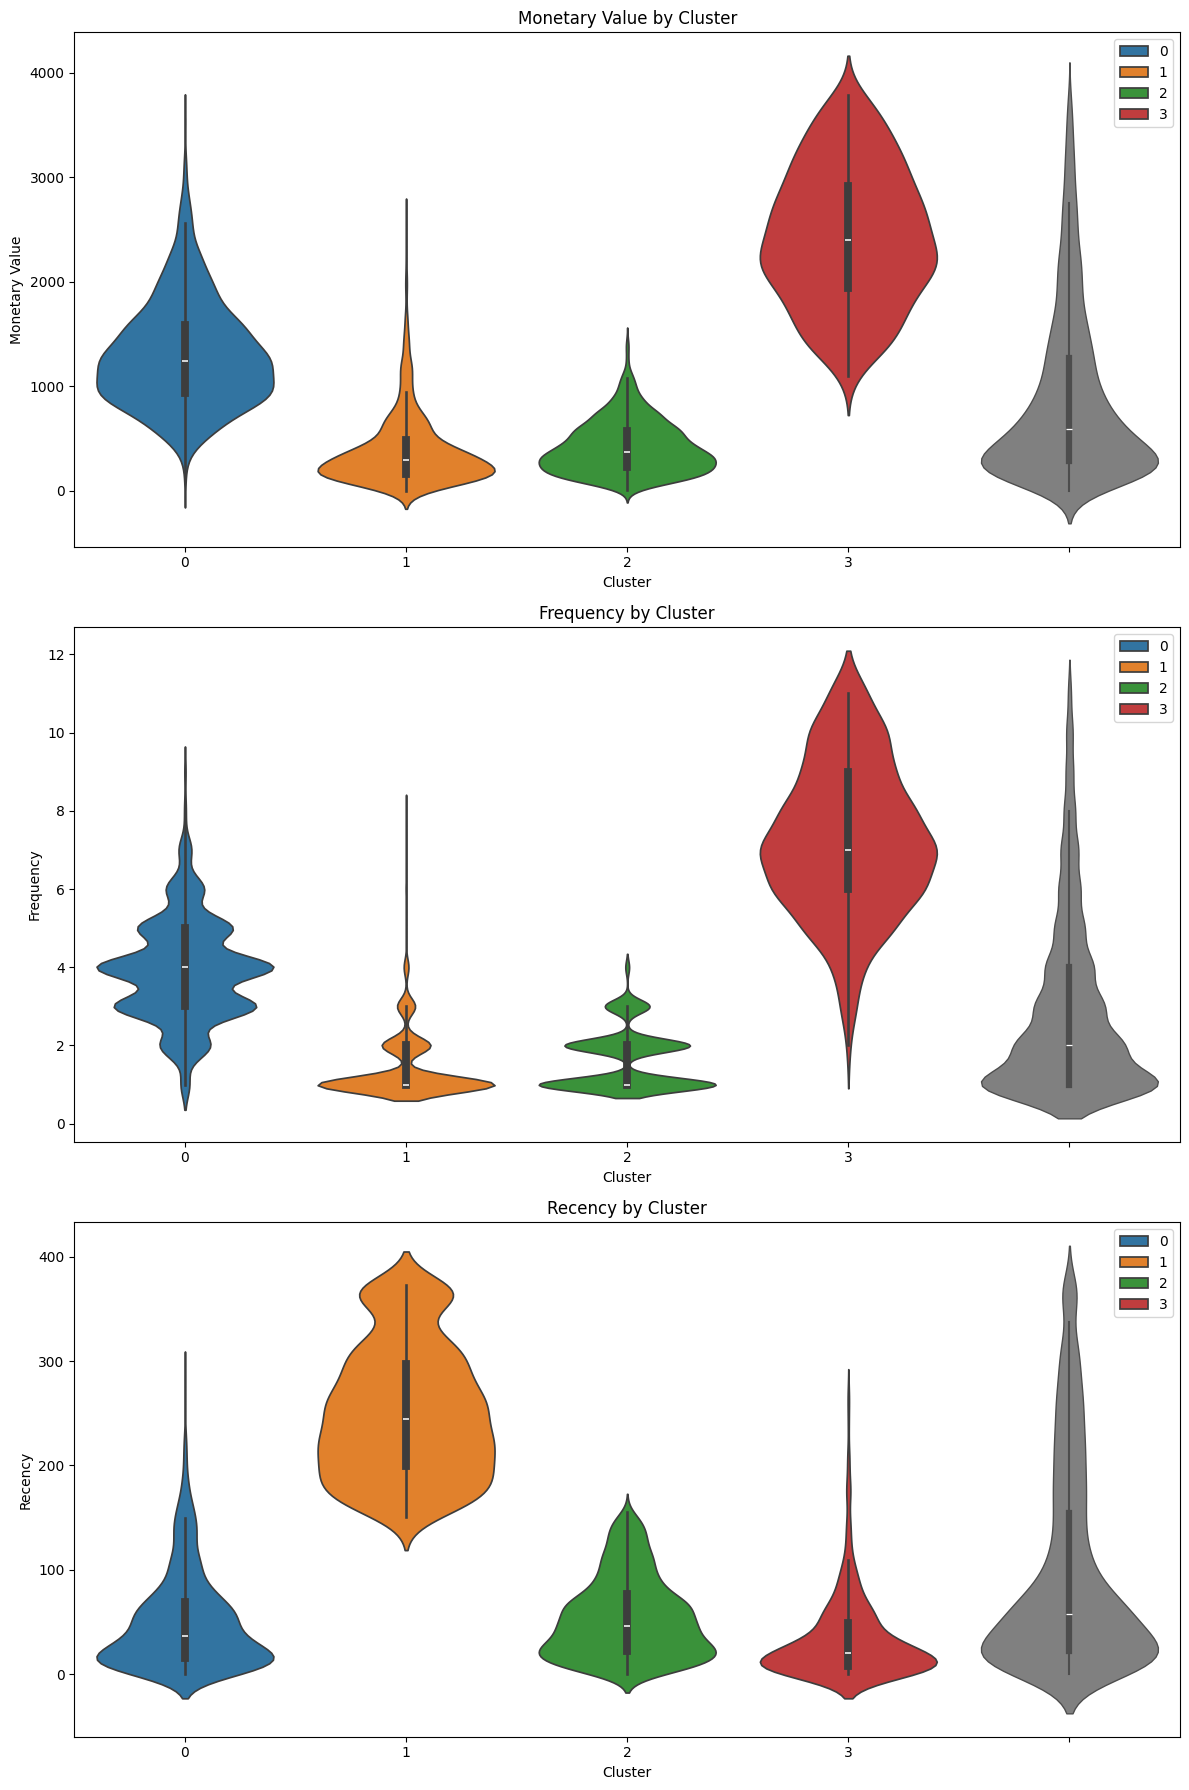

In [154]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color= 'gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'] ,y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()

1. Cluster 0 (Blue): "Retain"

• Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
• Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"

• Rationale: This group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

• Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"

• Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

• Action: Focus on building relationships, providing excellent customer service, and offering • Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"

• Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
• Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied




In [155]:
overlap_indices =  monetary_outliers_df.index.intersection(Frequency_outliers_df.index)

overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [156]:
overlap_count = overlap_indices.value_counts().sum()
overlap_count

226

customers who are outliers in both their spending amount and how often they make purchases (226 customers)

In [157]:
overlap_indices =  monetary_outliers_df.index.intersection(Frequency_outliers_df.index)

monetary_only_outliers_df = monetary_outliers_df.drop(overlap_indices) # Outliers only in MonetaryValue
frequency_only_outliers_df = Frequency_outliers_df.drop(overlap_indices) # Outliers only in Frequency
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices] # Outliers in both MonetaryValue and Frequency

# The minus sign is to say I did it manually and not as a result of Kmeans clustering
monetary_only_outliers_df['Cluster'] = -1
frequency_only_outliers_df['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers_df, frequency_only_outliers_df, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


Assign them to new clusters -1 (Monetary Outliers), -2 (Frequency Outliers), -3 ( Monetary and Frequency Outliers)

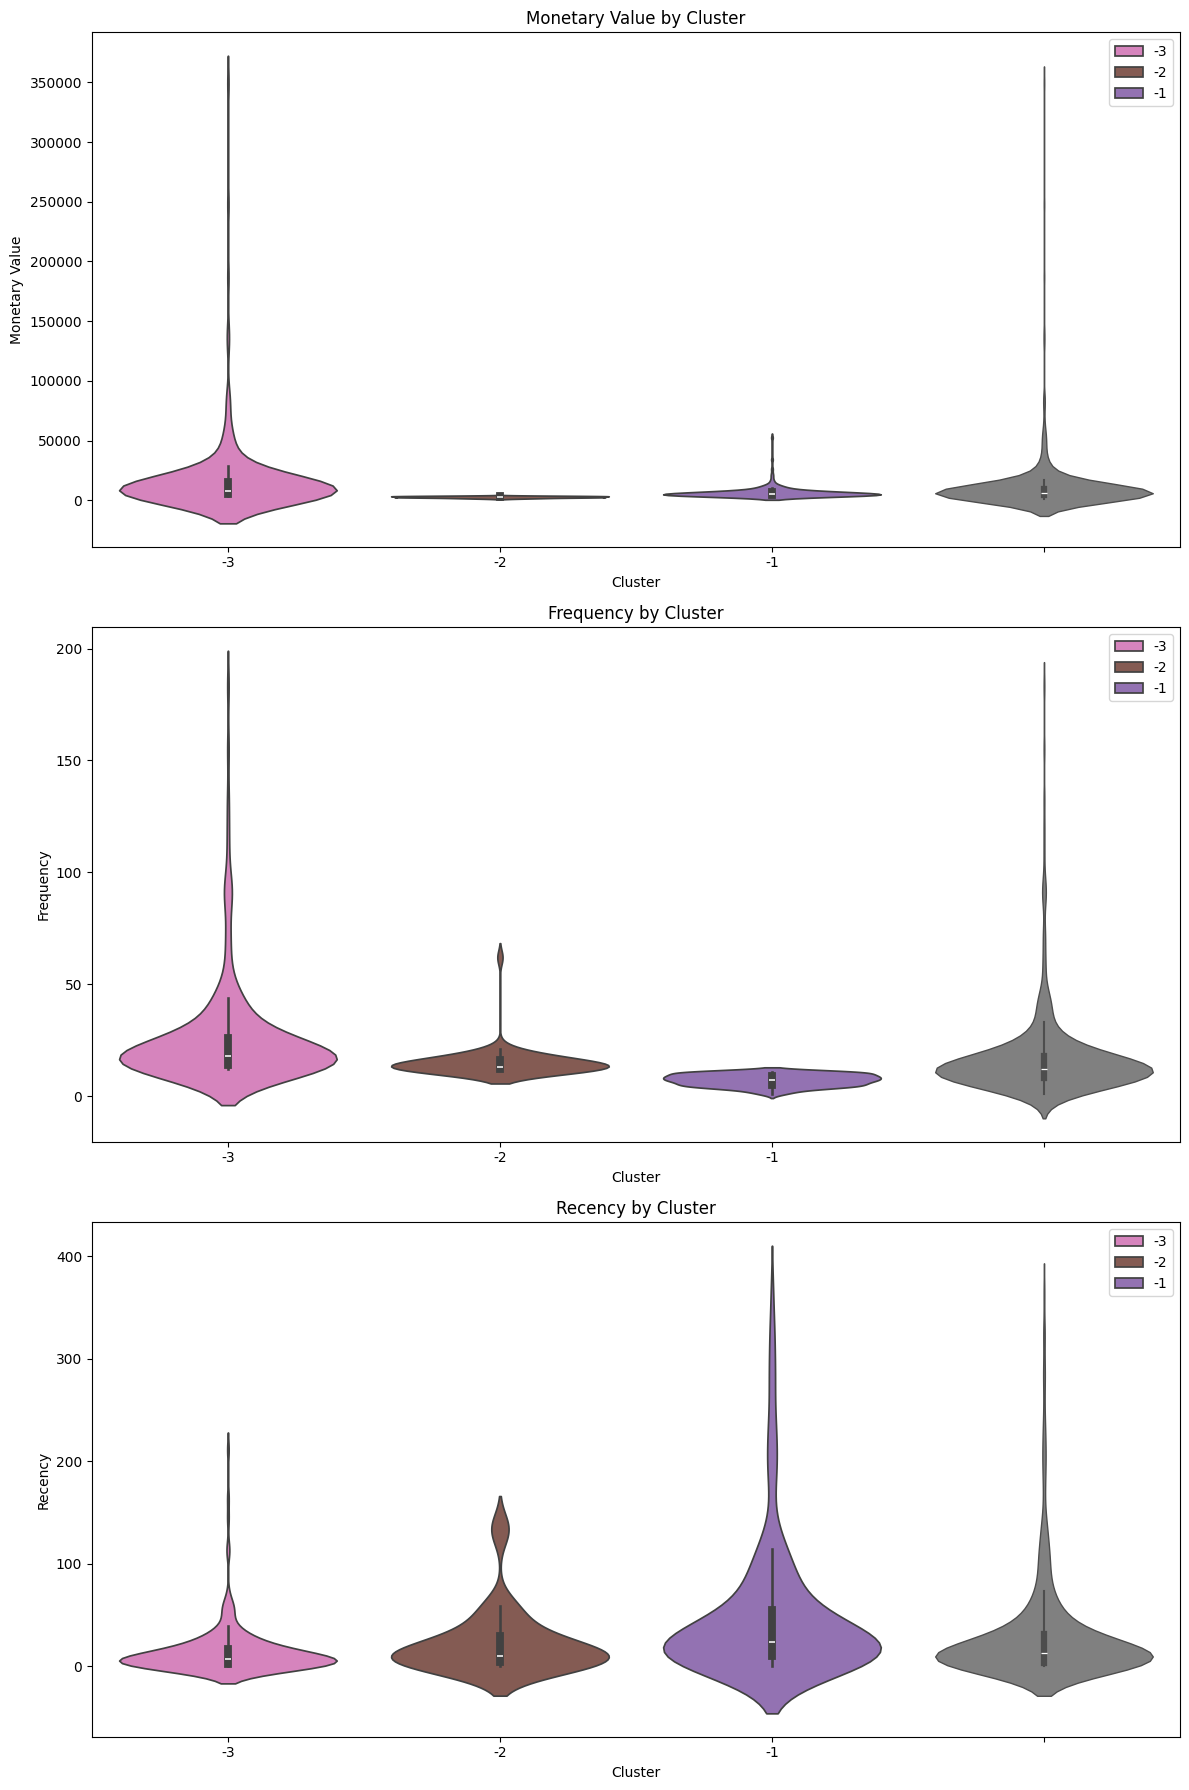

In [158]:
cluster_colors = {
    -1: '#9467bd', # purple
    -2: '#8c564b', # brown
    -3: '#e377c2'} # pinkish-purple

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color= 'gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'] ,y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()

* Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.

Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* ⁠Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.

Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* ⁠Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely our top-tier customers who require special attention.

Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [159]:
cluster_labels = {
    0: 'Retain',
    1: 'Reward',
    2: 'Nurture',
    3: 'Re-engage',
    -1: 'Pamper',
    -2: 'Upsell',
    -3: 'Delight'
}

In [160]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


This is combination of our Kmeans clusters and manual outliers label clusters

In [161]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Reward
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Nurture
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Delight
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Delight
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Delight
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Delight


In [162]:
full_clustering_df.groupby('ClusterLabel').size().sort_values(ascending=False)

,0
ClusterLabel,
Nurture,1499
Retain,914
Reward,902
Re-engage,494
Delight,226
Pamper,197
Upsell,53


# Visualization

<ipython-input-163-5f459d15c850>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
<ipython-input-163-5f459d15c850>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


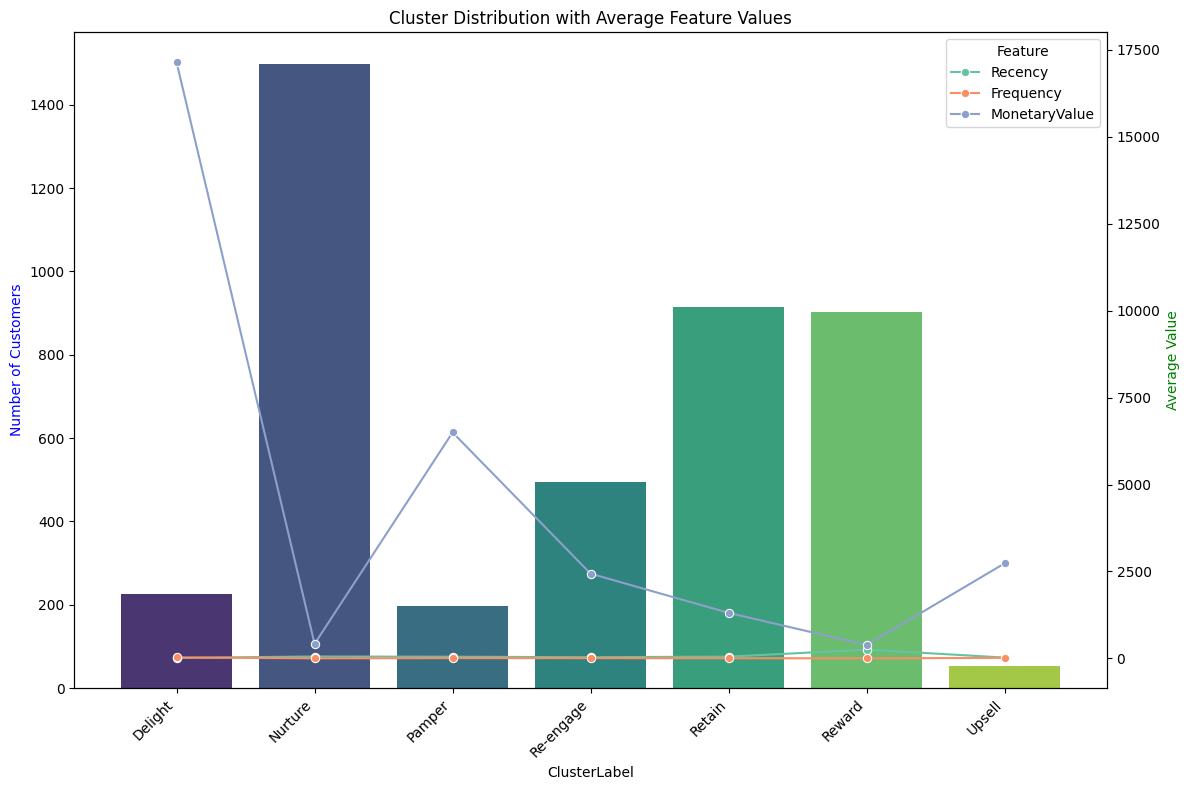

In [163]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

# Sort cluster_counts based on index (ClusterLabel)
cluster_counts = cluster_counts.sort_index()

feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

# Sort feature_means based on index (ClusterLabel)
feature_means = feature_means.sort_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

# Melt the DataFrame to long format for lineplot
feature_means = feature_means.reset_index().melt(id_vars='ClusterLabel', var_name='Feature', value_name='Value')

sns.lineplot(data=feature_means, x='ClusterLabel', y='Value', hue='Feature', ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

<ipython-input-164-61f34f9ac885>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
<ipython-input-164-61f34f9ac885>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


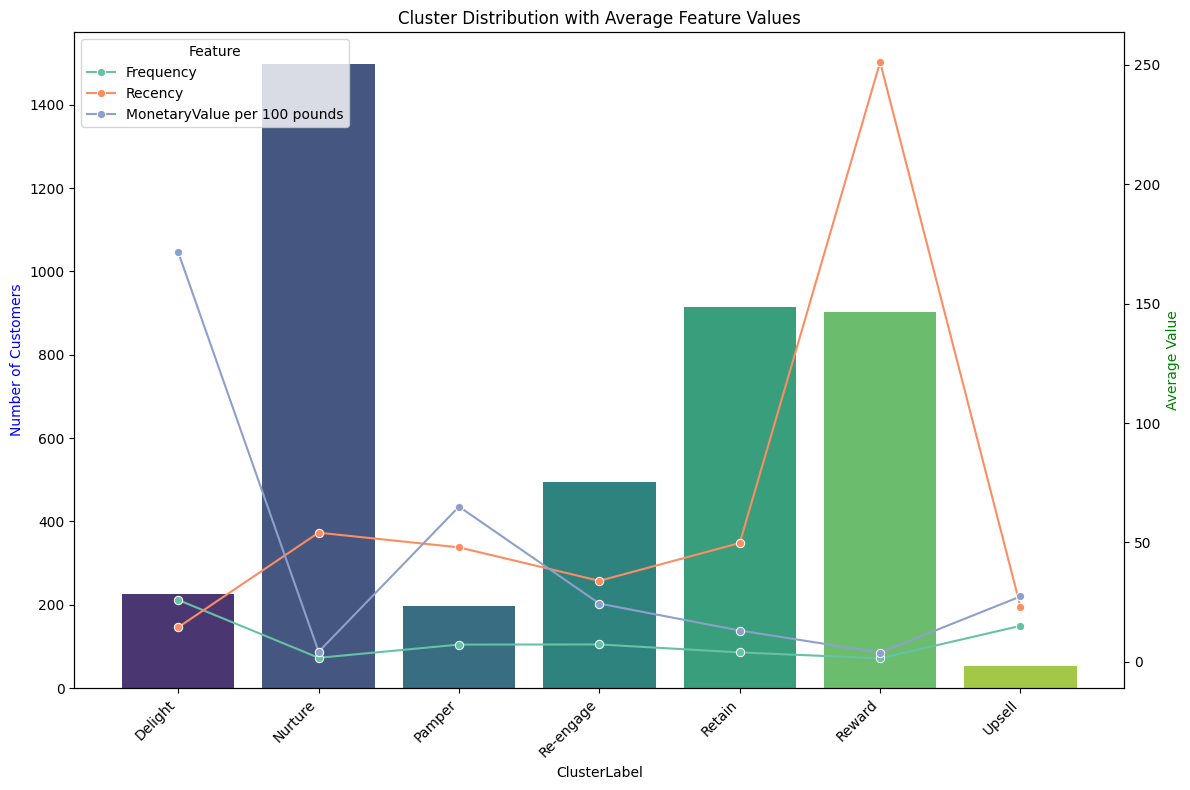

In [164]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue'] / 100
feature_means = full_clustering_df.groupby('ClusterLabel')[['Frequency', 'Recency', 'MonetaryValue per 100 pounds']].mean()

# Sort cluster_counts based on index (ClusterLabel)
cluster_counts = cluster_counts.sort_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

# Melt the DataFrame to long format for lineplot
feature_means = feature_means.reset_index().melt(id_vars='ClusterLabel', var_name='Feature', value_name='Value')

sns.lineplot(data=feature_means, x='ClusterLabel', y='Value', hue='Feature', ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

The purpose of dividing 'MonetaryValue' by 100 is to make the values smaller and easier to visualize alongside other features with different scales.